<a href="https://colab.research.google.com/github/angelarwa/TIL/blob/master/Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1월 10일

In [0]:
#tesseract설치& -pip install pytesseract
import cv2, numpy as np
import time
from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

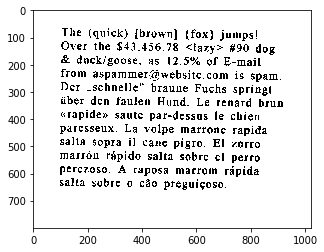

True

In [0]:
image = cv2.imread('ocr-text.png',0)   
#img_blur = cv2.GaussianBlur(image, (3,3), 0)
binary = cv2.adaptiveThreshold(image, 255,
          cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
          cv2.THRESH_BINARY, 21, 5)
imshow("", binary)
cv2.imwrite("out.png", binary)

In [0]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

str = print(pytesseract.image_to_string('out.png'))
print(str)

The (quick) [brown] {fox} jumps!
Over the $43,456.78 <lazy> #90 dog
& duck/goose, as 12.5% of E-mail
from aspammer@website.com is spam.
Der ,.schnelle” braune Fuchs springt
iiber den faulen Hund. Le renard brun
«rapide» saute par-dessus le chien
paresseux. La volpe marrone rapida
salta sopra il cane pigro. El zorro
marron rapido salta sobre el perro
perezoso. A raposa marrom rapida
salta sobre o céo preguicoso.
None


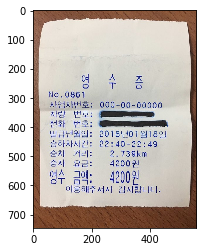

여
ㅇ
10.0861

사업지번로:

그ㅋ  1ㅎㆍ
진량. 먼오:

2:40-22:
2.7390
4200원
420(원

감사합니다.


In [0]:
str=pytesseract.image_to_string('mart5.jpg', lang='kor')
img = cv2.imread('mart5.jpg')
imshow("",img)
print(str)

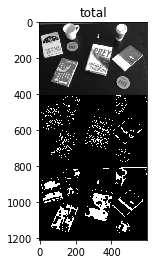

I found 4 books in that image


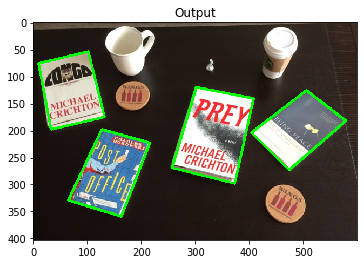

In [0]:
image = cv2.imread("book.jpg")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)

edged = cv2.Canny(gray, 10, 250) 
#캐니 엣지 추출 : 250보다 크면 엣지로 인식, 10보다 작으면 버린다./바이너리화의 일종

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
imshow("total", np.vstack([gray, edged, closed]))

cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
        total += 1
print("I found {0} books in that image".format(total))
imshow("Output", image)

In [0]:
from collections import Counter

def detect_weiqi(img):  
    txt = 'black'
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, threshold = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

    c = Counter(list(threshold.flatten()))
    print(c.most_common())
    if c.most_common()[0][0] != 0:
        txt = 'white'
    return txt, threshold

img = cv2.imread('stone.png')
img = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

[(255, 3119), (0, 17)]
[(0, 2514), (255, 850)]
[(255, 3113), (0, 23)]
[(255, 3358), (0, 6)]
[(255, 3138), (0, 226)]
[(255, 2945), (0, 191)]
[(255, 3140), (0, 224)]
[(0, 2646), (255, 490)]
[(0, 2393), (255, 743)]
[(255, 3234), (0, 130)]
[(0, 2621), (255, 515)]
[(0, 2726), (255, 638)]
[(0, 2606), (255, 530)]
[(0, 2697), (255, 439)]
[(255, 2859), (0, 57)]
[(255, 3159), (0, 205)]
[(0, 2447), (255, 689)]
[(0, 2717), (255, 647)]


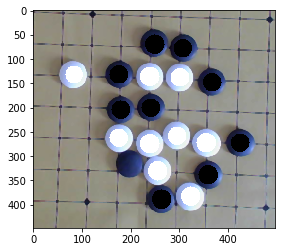

In [0]:
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT,
                                           1, 20, param1=100, param2=30, #100보다 크면 엣지로 인식,   
                               #해상도 ,원간 최소거리,edge threshold, circle 중심점 histogram수
                                           minRadius=10, maxRadius=50) #최소반지름, 최대반지름
circles = np.uint16(np.around(circles))
# print(circles)

font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i
    crop_img = img[y - r:y + r, x - r:x + r]    
    txt, threshold = detect_weiqi(crop_img)
    
    if txt == 'black' :  
        cv2.circle(img, (i[0], i[1]),int(i[2]*0.7), (0, 0, 0), -1)
    else :
        cv2.circle(img, (i[0], i[1]), int(i[2]*0.7), (255, 255, 255), -1)            


imshow("", img)

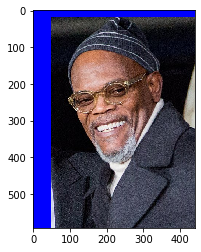

In [0]:
img=cv2.imread("SamuelJackson.jpg")
height,width=img.shape[:2]
M=np.float32([[1,0,50],[0,1,20]]) #변환 행렬/X축으로 10, Y축으로 20 이동
dst=cv2.warpAffine(img,M,(width,height),borderValue=(255,0,0)) 
#warpAffine(이미지, ?, 얼마나 이동할건지, 나머지 부분 색상)
imshow("",dst)
# zoom=cv2.resize(img, (200,200),interpolation=cv2.INTER_CUBIC)
# img2=cv2.flip(img,0) #1은 좌우반전, 0은 상하반전

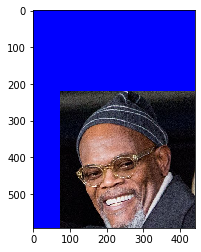

In [0]:
height,width=img.shape[:2]

x=np.random.randint(0,255)
y=np.random.randint(0,255)

M=np.float32([[1,0,x],[0,1,y]]) 
dst=cv2.warpAffine(img,M,(width,height),borderValue=(255,0,0)) 
imshow("",dst)

[[  0.8660254    0.5        -66.91016151]
 [ -0.5          0.8660254  232.28787769]]


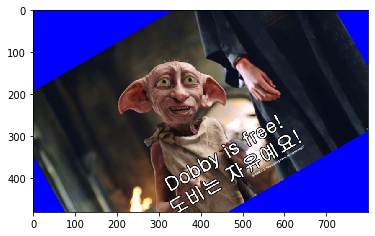

In [0]:
img=cv2.imread("Dobby is free.jpg")
height,width=img.shape[:2]
img_center=(width/2,height/2)
M=cv2.getRotationMatrix2D(img_center,30, 1.0) #이미지, 반시계 방향으로 45도, 스케일 그대로
print(M) #sin(30')=0.5/cos(30')=0.8660254
rotated_image=cv2.warpAffine(img,M,(width,height),borderValue=(255,0,0)) 
imshow("",rotated_image)

pts1 [[ 27. 179.]
 [611.  36.]
 [118. 534.]
 [754. 325.]]
pts2 [[  0.   0.]
 [811.   0.]
 [  0. 577.]
 [811. 577.]]
M [[ 6.11584185e-01 -1.56772284e-01  1.15494658e+01]
 [ 2.26751420e-01  9.26033771e-01 -1.71882333e+02]
 [-1.29571760e-04  4.23781663e-04  1.00000000e+00]]


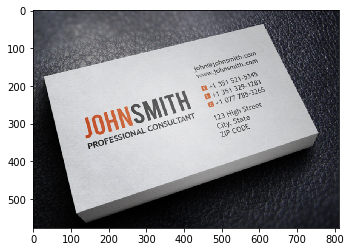

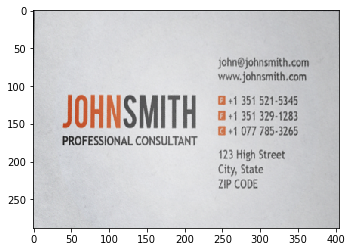

In [0]:
img = cv2.imread("namecard.png")

height, width = img.shape[:2]

# 좌표 순서 - 상단왼쪽 끝, 상단오른쪽 끝, 하단왼쪽 끝, 하단오른쪽 끝
point_list = [[27, 179], [611,36], [118,534], [754,325]]

pts1 = np.float32([list(point_list[0]),
                   list(point_list[1]),
                   list(point_list[2]),
                   list(point_list[3])])
pts1 = np.array([[27, 179], [611,36], [118,534], [754,325]], dtype="float32")
print("pts1",pts1)

pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
print("pts2",pts2)

pts2 = np.float32([[0,0],[width/2,0],[0,height/2],[width/2,height/2]])
M = cv2.getPerspectiveTransform(pts1,pts2)
print("M",M)

#img_result = cv2.warpPerspective(img, M, (width,height))
img_result = cv2.warpPerspective(img, M, (int(width/2),int(height/2)))
imshow("", img)
imshow("", img_result)